In [2]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import openpyxl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif')

# # drawio colors
# # 189,215,238
# # 255,230,153
# pal = sns.color_palette(['#BDD7EE', '#FFE699'])
# sns.set_palette("muted", 9)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

task_order = ["Remote Device Control", 'Scheduled Plans', "Comfort Home", "Energy Efficient Home"]

existing_dir_zh = 'zh-figures'
existing_dir_en = 'en-figures'
existing_dir_language = 'language-compare-figures'

In [3]:
def process_sheet(sheet_name):
    excel_raw_df = pd.read_excel('./result_llm4faas_4_sheet.xlsx', sheet_name=sheet_name)
    # name_line = excel_raw_df.head(1).dropna(axis=1, how='any')

    pass_rate_df = excel_raw_df[excel_raw_df['Index'].str.contains('Ready-to-Use Rate') == True].dropna(axis=1, how='any')
    compile_rate_df = excel_raw_df[excel_raw_df['Index'].str.contains('Compile Rate') == True].dropna(axis=1, how='any')
    pass_rate_df.iloc[:, 1:] *= 100  # Multiply all columns except the first one (Index) by 100
    compile_rate_df.iloc[:, 1:] *= 100  # Multiply all columns except the first one (Index) by 100

# Combine the pass_rate_df and compile_rate_df into a single dataframe
    raw_combined_df = pd.concat([ pass_rate_df, compile_rate_df], ignore_index=True)

    # print(raw_combined_df)

    result_rows = []

    if sheet_name == 'gpt4o':
        sheet_name = 'LLM4FaaS'
    elif sheet_name == 'baseline_v2':
        sheet_name = 'Baseline'
    else:
        sheet_name = 'Baseline_v1'


    for index, row in raw_combined_df.iterrows():
        for column in raw_combined_df.columns[1:]:  # 跳过 'Index' 列
            if pd.notna(row[column]):  # 如果该列有有效的值
                result_rows.append({
                    'Type': row['Index'],
                    'Task': column,  # 列名即任务类型
                    'Rate': row[column],  # 对应的数值
                    'Experiment': sheet_name
                })

    # 将结果转化为 DataFrame
    result_df = pd.DataFrame(result_rows)

    return result_df


# process_sheet('gpt4o')

sheet_names = ['gpt4o', 'baseline_v2']
#
all_dataframes = [process_sheet(sheet_name) for sheet_name in sheet_names]
# # #
final_df = pd.concat(all_dataframes, ignore_index=True)
# #
print(final_df)
# #
final_df.to_csv('gpt4o_df.csv', index=False)

                 Type                   Task       Rate Experiment
0   Ready-to-Use Rate  Remote Device Control  86.956522   LLM4FaaS
1   Ready-to-Use Rate        Scheduled Plans  81.538462   LLM4FaaS
2   Ready-to-Use Rate           Comfort Home  60.256410   LLM4FaaS
3   Ready-to-Use Rate  Energy Efficient Home  57.142857   LLM4FaaS
4        Compile Rate  Remote Device Control  91.304348   LLM4FaaS
5        Compile Rate        Scheduled Plans  90.769231   LLM4FaaS
6        Compile Rate           Comfort Home  87.179487   LLM4FaaS
7        Compile Rate  Energy Efficient Home  80.952381   LLM4FaaS
8   Ready-to-Use Rate  Remote Device Control  56.521739   Baseline
9   Ready-to-Use Rate        Scheduled Plans  61.538462   Baseline
10  Ready-to-Use Rate           Comfort Home  32.051282   Baseline
11  Ready-to-Use Rate  Energy Efficient Home  23.809524   Baseline
12       Compile Rate  Remote Device Control  91.304348   Baseline
13       Compile Rate        Scheduled Plans  83.076923   Base

webf NOT subset; don't know how to subset; dropped


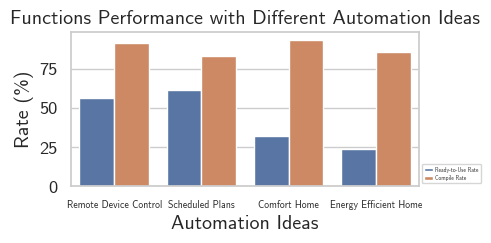

webf NOT subset; don't know how to subset; dropped


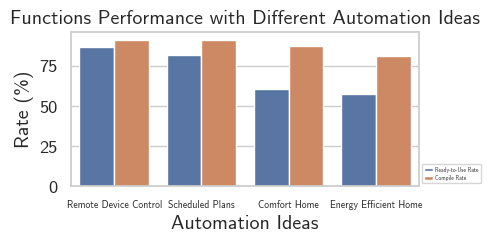

In [4]:
gpt4o_df = pd.read_csv('gpt4o_df.csv')

task_order = ["Remote Device Control", 'Scheduled Plans', "Comfort Home", "Energy Efficient Home"]
gpt4o_df['Task'] = pd.Categorical(gpt4o_df['Task'], categories=task_order, ordered=True)
gpt4o_df = gpt4o_df.sort_values(by='Task')


llm4faas_df = gpt4o_df[gpt4o_df['Experiment'] == 'LLM4FaaS']
baseline_df = gpt4o_df[gpt4o_df['Experiment'] == 'Baseline']

def barplot_exp(data):
    g = sns.barplot(data=data, x='Task', y='Rate', hue='Type', order=task_order)

    handles, labels = g.get_legend_handles_labels()

    if handles and labels:
        legend = plt.legend(
            handles=handles,
            labels=labels,
            loc='lower left',
            bbox_to_anchor=(1,0),
            fontsize=4,          # Adjust font size
            handlelength=1.5,          # Adjust length of legend handles
            handletextpad=0.5,         # Space between handle and text
            borderpad=0.4,             # Padding between legend border and content
            borderaxespad=0.5,         # Padding between legend border and axes
            title=None,      # Add a title if needed
            title_fontsize='medium',    # Font size of the title
            ncol = 1,
            frameon = True,
        )

    g.set_title(f"Functions Performance with Different Automation Ideas")
    g.set_xlabel("Automation Ideas")
    g.set_ylabel("Rate (%)")
    plt.xticks(fontsize=7)
    plt.yticks([0, 25, 50, 75])


    df_name = [name for name, value in globals().items() if value is data][0]
    file_name = f"{df_name}_barplot.pdf"  # Generate file name based on DataFrame name

    # Save the plot as PDF
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()


barplot_exp(baseline_df)
barplot_exp(llm4faas_df)


webf NOT subset; don't know how to subset; dropped


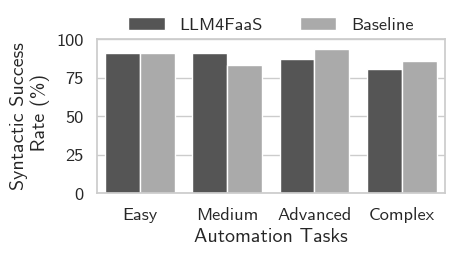

In [7]:
gpt4o_df = pd.read_csv('gpt4o_df.csv')


gpt4o_df['Task'] = gpt4o_df['Task'].replace({
    "Remote Device Control": "Easy",
    "Scheduled Plans": "Medium",
    "Comfort Home": "Advanced",
    "Energy Efficient Home": "Complex"
})
task_order = ["Easy", "Medium", "Advanced", "Complex"]

# task_order = ["Remote Device Control", 'Scheduled Plans', "Comfort Home", "Energy Efficient Home"]
gpt4o_df['Task'] = pd.Categorical(gpt4o_df['Task'], categories=task_order, ordered=True)
gpt4o_df = gpt4o_df.sort_values(by='Task')

# llm4faas_df = gpt4o_df[gpt4o_df['Experiment'] == 'LLM4FaaS']
# baseline_df = gpt4o_df[gpt4o_df['Experiment'] == 'Baseline']
ready_to_use_df = gpt4o_df[gpt4o_df['Type'] == 'Ready-to-Use Rate']
compile_df = gpt4o_df[gpt4o_df['Type'] == 'Compile Rate']

def barplot_rate(data):
    g = sns.barplot(data=data, x='Task', y='Rate', hue='Experiment', order=task_order, palette='gray')

    handles, labels = g.get_legend_handles_labels()

    if handles and labels:
        legend = plt.legend(
            # handles=handles,
            # labels=labels,
            loc='upper center',
            bbox_to_anchor=(0.5,1.25),
            # fontsize=4,          # Adjust font size
            # handlelength=1.5,          # Adjust length of legend handles
            # handletextpad=0.5,         # Space between handle and text
            # borderpad=0.4,             # Padding between legend border and content
            # borderaxespad=0.5,         # Padding between legend border and axes
            # title=None,      # Add a title if needed
            # title_fontsize='medium',    # Font size of the title
            ncol = 2,
            frameon = False,
        )
    df_name = [name for name, value in globals().items() if value is data][0]

    # g.set_title(f"Semantic Success Rate with Automation Ideas")
    # g.set_ylabel("Semantic Success\n Rate (%)")

    # g.set_title(f"Compile Rate with Automation Ideas")
    g.set_ylabel("Syntactic Success\n Rate (%)")

    g.set_xlabel("Automation Tasks")
    # plt.xticks(rotation=0, fontsize=12)
    plt.yticks([0, 25, 50, 75, 100])

    file_name = f"{df_name}_barplot.pdf"  # Generate file name based on DataFrame name

    # Save the plot as PDF
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()


# barplot_rate(ready_to_use_df)
barplot_rate(compile_df)

In [9]:
# g = sns.lineplot(data= gpt4o_df, x='Task', y='Rate', hue='Experiment', markers=True, style='Type')

handles, labels = g.get_legend_handles_labels()

if handles and labels:
    new_handles = [handle for i, handle in enumerate(handles) if labels[i] not in ['Experiment', 'Type']]
    new_labels = [label for label in labels if label not in ['Experiment', 'Type']]

    legend = plt.legend(
        handles=new_handles,
        labels=new_labels,
        loc='lower left',
        bbox_to_anchor=(1, 0),
        fontsize=8,
        handlelength=1.5,
        handletextpad=0.5,
        borderpad=0.4,
        borderaxespad=0.5,
        ncol=1,
        frameon=True,
    )

    g.set_title(f"Functions Performance with Automation Ideas")
    g.set_xlabel('Automation Ideas')
    g.set_ylabel('Rate (%)')
    plt.xticks(fontsize=8.5)

plt.savefig("llm4faas_baseline_comparison.pdf", bbox_inches = 'tight')


NameError: name 'g' is not defined

webf NOT subset; don't know how to subset; dropped


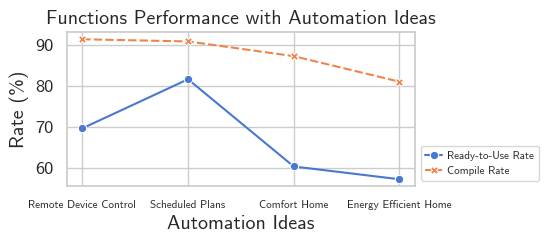

In [9]:
g = sns.lineplot(data= llm4faas_df, x='Task', y='Rate', hue='Type', markers=True, style='Type')

handles, labels = g.get_legend_handles_labels()
if handles and labels:
    # Remove the legend entries related to 'Type'
    new_handles = [handle for i, handle in enumerate(handles) if labels[i] != 'Type']
    new_labels = [label for label in labels if label != 'Type']

    legend = plt.legend(
        handles=new_handles,
        labels=new_labels,
        loc='lower left',
        bbox_to_anchor=(1, 0),
        fontsize=8,
        handlelength=1.5,
        handletextpad=0.5,
        borderpad=0.4,
        borderaxespad=0.5,
        ncol=1,
        frameon=True,
    )

g.set_title("Functions Performance with Automation Ideas")
g.set_xlabel('Automation Ideas')
g.set_ylabel('Rate (%)')
plt.xticks(fontsize=8)

# Save the figure
plt.savefig("llm4faas_lineplot.pdf", bbox_inches='tight')


webf NOT subset; don't know how to subset; dropped


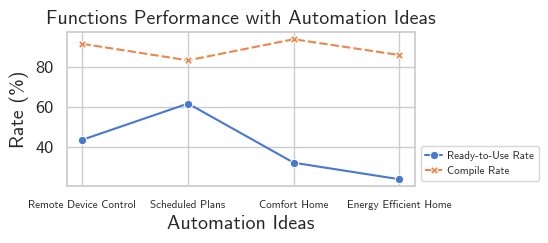

In [10]:
g = sns.lineplot(data= baseline_df, x='Task', y='Rate', hue='Type', markers=True, style='Type')

handles, labels = g.get_legend_handles_labels()
if handles and labels:
    # Remove the legend entries related to 'Type'
    new_handles = [handle for i, handle in enumerate(handles) if labels[i] != 'Type']
    new_labels = [label for label in labels if label != 'Type']

    legend = plt.legend(
        handles=new_handles,
        labels=new_labels,
        loc='lower left',
        bbox_to_anchor=(1, 0),
        fontsize=8,
        handlelength=1.5,
        handletextpad=0.5,
        borderpad=0.4,
        borderaxespad=0.5,
        ncol=1,
        frameon=True,
    )

g.set_title("Functions Performance with Automation Ideas")
g.set_xlabel('Automation Ideas')
g.set_ylabel('Rate (%)')
plt.xticks(fontsize=8)

# Save the figure
plt.savefig("baseline_lineplot.pdf", bbox_inches='tight')

